In [2]:
# Import useful libraries for analysis
import numpy as np
from matplotlib import pyplot as plt

from SignalCalculator import SignalCalculator

plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = (9,8)



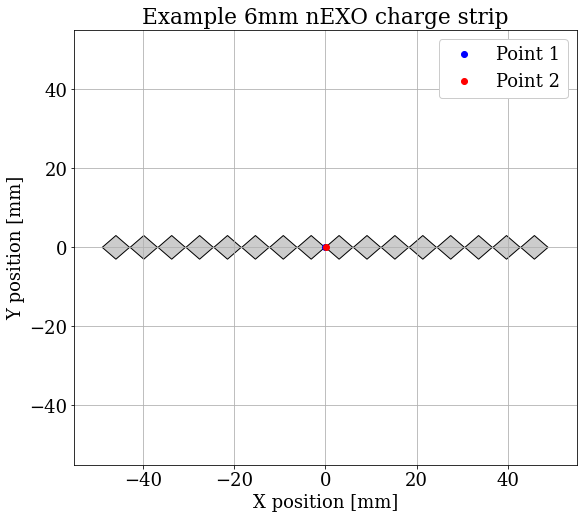

In [3]:
padSize = 6.12 #6mm pad pitch along the diagonal of the individual pad squares
numPads = 16 #pads per strip
padGap = 0.085 #mm gap between pads, normal distance between two edges shrinks the actual size of the square

SignalCalculator.DrawStrip(padSize, numPads, padGap)

pt1 = (0., .1, 300.) # (x,y,z) coordinates of ionization event, given in mm
pt2 = (.1, 0., 300.) # (x,y,z) coordinates of ionization event, given in mm

plt.plot(pt1[0],pt1[1],'ob',label='Point 1')
plt.plot(pt2[0],pt2[1],'or',label='Point 2')
plt.xlabel('X position [mm]')
plt.ylabel('Y position [mm]')
plt.title('Example 6mm nEXO charge strip')
plt.grid()
plt.legend(framealpha=1.)


/Users/ejangelico/Documents/Stanford/Tiles/modeling/CurrentAndChargeSignalCalculator/SignalCalculator/SignalCalculator.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  return np.arctan(x*y / (z * np.sqrt(x**2 + y**2 + z**2)))


(0.0, 1.05)

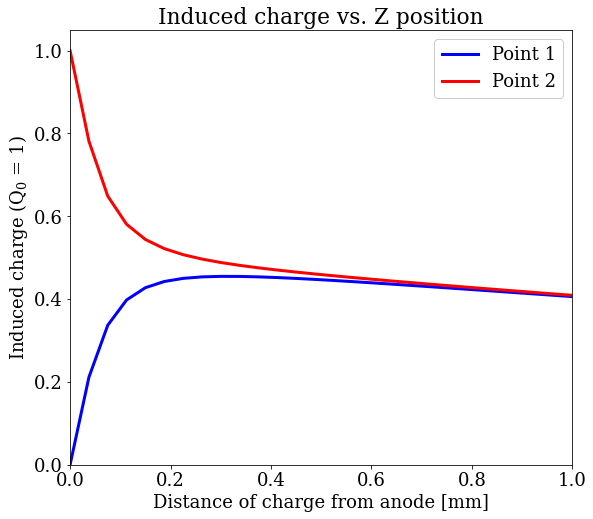

In [7]:
Q = 1. # Assume a unit charge

n_zsteps = 8000

pt1_z_steps = np.linspace( 0., pt1[2], n_zsteps)
pt2_z_steps = np.linspace( 0., pt2[2], n_zsteps)

pt1_charge_vs_z = np.zeros(n_zsteps)
pt2_charge_vs_z = np.zeros(n_zsteps)


for i in range(n_zsteps):
    
    pt1_charge_vs_z[i] = SignalCalculator.InducedChargeNEXOStrip( 1., \
                                                                    pt1[0], pt1[1], \
                                                                    pt1_z_steps[i], \
                                                                    padSize=6.)
    pt2_charge_vs_z[i] = SignalCalculator.InducedChargeNEXOStrip( 1., \
                                                                    pt2[0], pt2[1], \
                                                                    pt2_z_steps[i], \
                                                                    padSize=6.)


plt.plot(pt1_z_steps,pt1_charge_vs_z,'-b',linewidth=3,label='Point 1')
plt.plot(pt2_z_steps,pt2_charge_vs_z,'-r',linewidth=3,label='Point 2')

plt.xlabel('Distance of charge from anode [mm]')
plt.ylabel(r'Induced charge (Q$_0$ = 1)')
plt.title('Induced charge vs. Z position')
plt.legend(framealpha=1.)
plt.xlim(0.,1.)
plt.ylim(0.0,1.05)


/Users/ejangelico/Documents/Stanford/Tiles/modeling/CurrentAndChargeSignalCalculator/SignalCalculator/SignalCalculator.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  return np.arctan(x*y / (z * np.sqrt(x**2 + y**2 + z**2)))


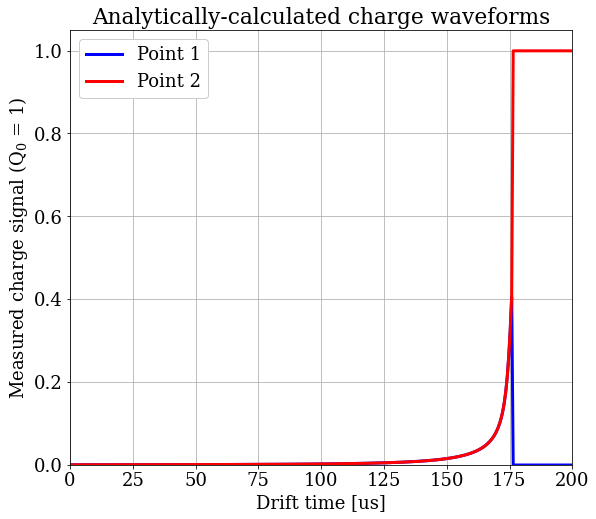

In [8]:
plt.title('Analytically-calculated charge waveforms')

pt1_drift_points, pt1_charge_wfm = SignalCalculator.ComputeChargeWaveformOnStripWithIons( \
                                                    Q, pt1[0], pt1[1], pt1[2], \
                                                    padSize=6., numPads=16 )
pt2_drift_points, pt2_charge_wfm = SignalCalculator.ComputeChargeWaveformOnStripWithIons( \
                                                    Q, pt2[0], pt2[1], pt2[2], \
                                                    padSize=6., numPads=16 )

# Add an extra point on the end to force the charge signal to stay at the 
# amount of collected charge after the collection takes place
pt1_drift_points = np.append( pt1_drift_points, 200.)
pt2_drift_points = np.append( pt2_drift_points, 200.)

pt1_charge_wfm = np.append( pt1_charge_wfm, pt1_charge_wfm[-1])
pt2_charge_wfm = np.append( pt2_charge_wfm, pt2_charge_wfm[-1])


# Plot the waveforms
plt.plot(pt1_drift_points,pt1_charge_wfm,'-b',linewidth=3,label='Point 1')
plt.plot(pt2_drift_points,pt2_charge_wfm,'-r',linewidth=3,label='Point 2')

plt.xlabel('Drift time [us]')
plt.ylabel(r'Measured charge signal (Q$_0$ = 1)')

plt.xlim(0.,200.)
plt.ylim(0.,1.05)

plt.legend(framealpha=1.)
plt.grid()


    

/Users/ejangelico/Documents/Stanford/Tiles/modeling/CurrentAndChargeSignalCalculator/SignalCalculator/SignalCalculator.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  return np.arctan(x*y / (z * np.sqrt(x**2 + y**2 + z**2)))


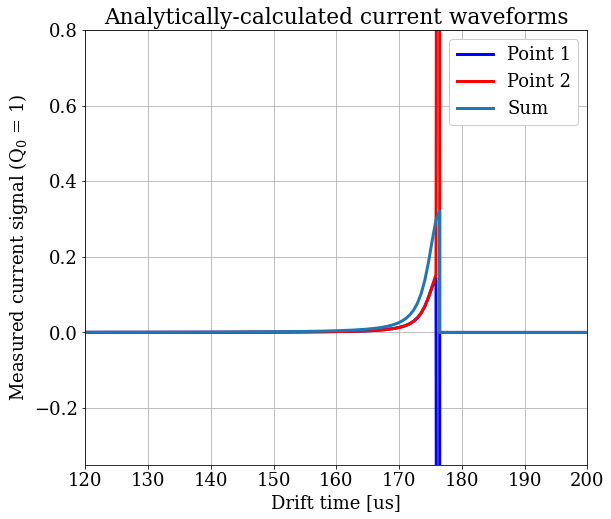

In [10]:
plt.title('Analytically-calculated current waveforms')

pt1_drift_points, pt1_current_wfm = SignalCalculator.ComputeCurrentWaveformOnStrip( \
                                                    Q, pt1[0], pt1[1], pt1[2], \
                                                    padSize=6., numPads=16 )
pt2_drift_points, pt2_current_wfm = SignalCalculator.ComputeCurrentWaveformOnStrip( \
                                                    Q, pt2[0], pt2[1], pt2[2], \
                                                    padSize=6., numPads=16 )

# Add extra points on the end to force the current to go to 0 after
# the charge gets collected.
pt1_drift_points = np.append( pt1_drift_points, pt1_drift_points[-1])
pt2_drift_points = np.append( pt2_drift_points, pt2_drift_points[-1])

pt1_drift_points = np.append( pt1_drift_points, 200.)
pt2_drift_points = np.append( pt2_drift_points, 200.)

pt1_current_wfm = np.append( pt1_current_wfm, [0., 0.])
pt2_current_wfm = np.append( pt2_current_wfm, [0., 0.])


# Plot the waveforms
plt.plot(pt1_drift_points,pt1_current_wfm,'-b',linewidth=3,label='Point 1')
plt.plot(pt2_drift_points,pt2_current_wfm,'-r',linewidth=3,label='Point 2')
plt.plot(pt1_drift_points,[pt1_current_wfm[i] + pt2_current_wfm[i] for i in range(len(pt1_drift_points))], linewidth=3, label="Sum")

plt.xlabel('Drift time [us]')
plt.ylabel(r'Measured current signal (Q$_0$ = 1)')

plt.xlim(120.,200.)
plt.ylim(-0.35,0.8)
plt.legend(framealpha=1.)
plt.grid()


/Users/ejangelico/Documents/Stanford/Tiles/modeling/CurrentAndChargeSignalCalculator/SignalCalculator/SignalCalculator.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  return np.arctan(x*y / (z * np.sqrt(x**2 + y**2 + z**2)))
/Users/ejangelico/Documents/Stanford/Tiles/modeling/CurrentAndChargeSignalCalculator/SignalCalculator/SignalCalculator.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  return np.arctan(x*y / (z * np.sqrt(x**2 + y**2 + z**2)))
/Users/ejangelico/Documents/Stanford/Tiles/modeling/CurrentAndChargeSignalCalculator/SignalCalculator/SignalCalculator.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  return np.arctan(x*y / (z * np.sqrt(x**2 + y**2 + z**2)))
/Users/ejangelico/Documents/Stanford/Tiles/modeling/CurrentAndChargeSignalCalculator/SignalCalculator/SignalCalculator.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  return np.arctan(x*y / (z * np.sqrt(x**2 + y**2 + z**2)))
/Users/ejang

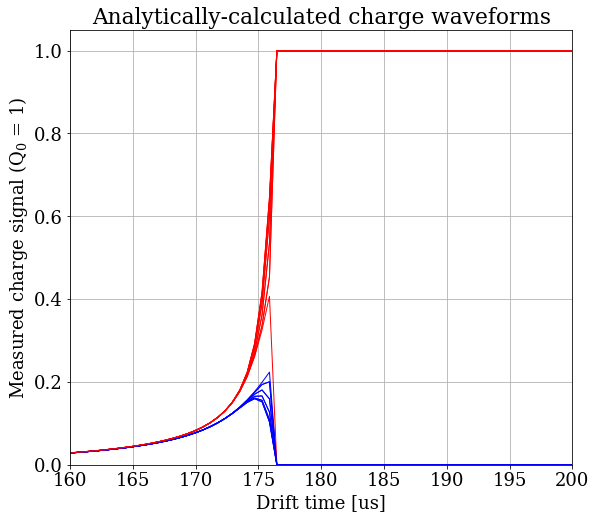

In [6]:
#testing that a padGap exists; easiest way at the moment is to go along the center line of a strip
#because the code is such that the "bridge" connecting pads doesn't exist, and there is a gap between
#the pads instead. 

padSize = 6 #6mm pad pitch along the diagonal of the individual pad squares
numPads = 16 #pads per strip
padGap = None #mm gap between pads, normal distance between two edges shrinks the actual size of the square
numWfmPoints = 800

xvalues = np.linspace(0, padSize, 11)
plt.title('Analytically-calculated charge waveforms')
for j, xshift in enumerate(xvalues):


    pt1_drift_points, pt1_charge_wfm = SignalCalculator.ComputeChargeWaveformOnStripWithIons( \
                                                        Q, pt1[0] + xshift, pt1[1], pt1[2], \
                                                        padSize=padSize, numPads=numPads, padGap=padGap )
    pt2_drift_points, pt2_charge_wfm = SignalCalculator.ComputeChargeWaveformOnStripWithIons( \
                                                        Q, pt2[0] + xshift, pt2[1], pt2[2], \
                                                        padSize=padSize, numPads=numPads, padGap=padGap )

    # Add an extra point on the end to force the charge signal to stay at the 
    # amount of collected charge after the collection takes place
    pt1_drift_points = np.append( pt1_drift_points, 200.)
    pt2_drift_points = np.append( pt2_drift_points, 200.)

    pt1_charge_wfm = np.append( pt1_charge_wfm, pt1_charge_wfm[-1])
    pt2_charge_wfm = np.append( pt2_charge_wfm, pt2_charge_wfm[-1])


    # Plot the waveforms
    plt.plot(pt1_drift_points,pt1_charge_wfm,'-b',linewidth=1,label='Point 1')
    plt.plot(pt2_drift_points,pt2_charge_wfm,'-r',linewidth=1,label='Point 2')

plt.xlabel('Drift time [us]')
plt.ylabel(r'Measured charge signal (Q$_0$ = 1)')

plt.xlim(160,200.)
plt.ylim(0.,1.05)

#plt.legend(framealpha=1.)
plt.grid()


/Users/ejangelico/Documents/Stanford/Tiles/modeling/CurrentAndChargeSignalCalculator/SignalCalculator/SignalCalculator.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  return np.arctan(x*y / (z * np.sqrt(x**2 + y**2 + z**2)))
/Users/ejangelico/Documents/Stanford/Tiles/modeling/CurrentAndChargeSignalCalculator/SignalCalculator/SignalCalculator.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  return np.arctan(x*y / (z * np.sqrt(x**2 + y**2 + z**2)))
/Users/ejangelico/Documents/Stanford/Tiles/modeling/CurrentAndChargeSignalCalculator/SignalCalculator/SignalCalculator.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  return np.arctan(x*y / (z * np.sqrt(x**2 + y**2 + z**2)))
/Users/ejangelico/Documents/Stanford/Tiles/modeling/CurrentAndChargeSignalCalculator/SignalCalculator/SignalCalculator.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  return np.arctan(x*y / (z * np.sqrt(x**2 + y**2 + z**2)))
/Users/ejang

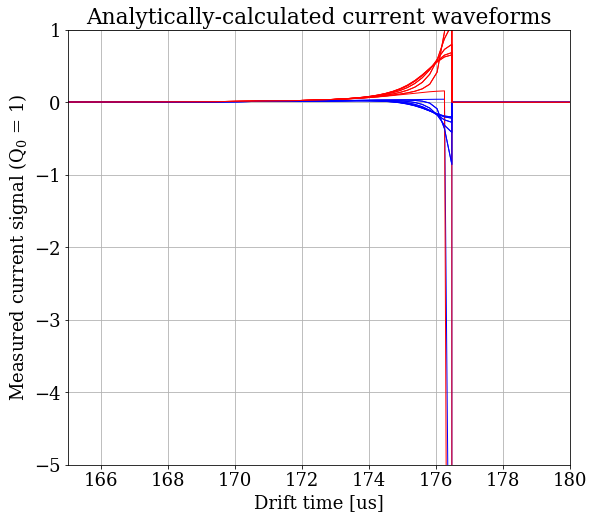

In [7]:
#testing that a padGap exists; easiest way at the moment is to go along the center line of a strip
#because the code is such that the "bridge" connecting pads doesn't exist, and there is a gap between
#the pads instead. 

padSize = 6 #6mm pad pitch along the diagonal of the individual pad squares
numPads = 16 #pads per strip
padGap = None #mm gap between pads, normal distance between two edges shrinks the actual size of the square
numWfmPoints = 800

plt.title('Analytically-calculated current waveforms')

xvalues = np.linspace(0, padSize, 11)
for j, xshift in enumerate(xvalues):
    pt1_drift_points, pt1_current_wfm = SignalCalculator.ComputeCurrentWaveformOnStrip( \
                                                        Q, pt1[0] + xshift, pt1[1], pt1[2], \
                                                        padSize=6., numPads=16, numWfmPoints=numWfmPoints )
    pt2_drift_points, pt2_current_wfm = SignalCalculator.ComputeCurrentWaveformOnStrip( \
                                                        Q, pt2[0] + xshift, pt2[1], pt2[2], \
                                                        padSize=6., numPads=16, numWfmPoints=numWfmPoints )
    
    # Add extra points on the end to force the current to go to 0 after
    # the charge gets collected.
    pt1_drift_points = np.append( pt1_drift_points, pt1_drift_points[-1])
    pt2_drift_points = np.append( pt2_drift_points, pt2_drift_points[-1])

    pt1_drift_points = np.append( pt1_drift_points, 200.)
    pt2_drift_points = np.append( pt2_drift_points, 200.)

    pt1_current_wfm = np.append( pt1_current_wfm, [0., 0.])
    pt2_current_wfm = np.append( pt2_current_wfm, [0., 0.])
    


    # Plot the waveforms
    plt.plot(pt1_drift_points,pt1_current_wfm,'-b',linewidth=1,label='Point 1')
    plt.plot(pt2_drift_points,pt2_current_wfm,'-r',linewidth=1,label='Point 2')

plt.xlabel('Drift time [us]')
plt.ylabel(r'Measured current signal (Q$_0$ = 1)')

plt.xlim(165.,180)
#points that are right on the gap have a very high negative derivative in charge
plt.ylim(-5,1)
#plt.legend(framealpha=1.)
plt.grid()